In [ ]:
# Week 1

## Learning Goal

In [56]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline


In [57]:
# Load datasets
features = pd.read_csv('./data/walmart/features.csv')
stores = pd.read_csv('./data/walmart/stores.csv')
train = pd.read_csv('./data/walmart/train.csv')
test = pd.read_csv('./data/walmart/test.csv')


   Store  Dept        Date  Weekly_Sales  IsHoliday
0      1     1  2010-02-05      24924.50      False
1      1     1  2010-02-12      46039.49       True
2      1     1  2010-02-19      41595.55      False
3      1     1  2010-02-26      19403.54      False
4      1     1  2010-03-05      21827.90      False
               Store           Dept   Weekly_Sales
count  421570.000000  421570.000000  421570.000000
mean       22.200546      44.260317   15981.258123
std        12.785297      30.492054   22711.183519
min         1.000000       1.000000   -4988.940000
25%        11.000000      18.000000    2079.650000
50%        22.000000      37.000000    7612.030000
75%        33.000000      74.000000   20205.852500
max        45.000000      99.000000  693099.360000


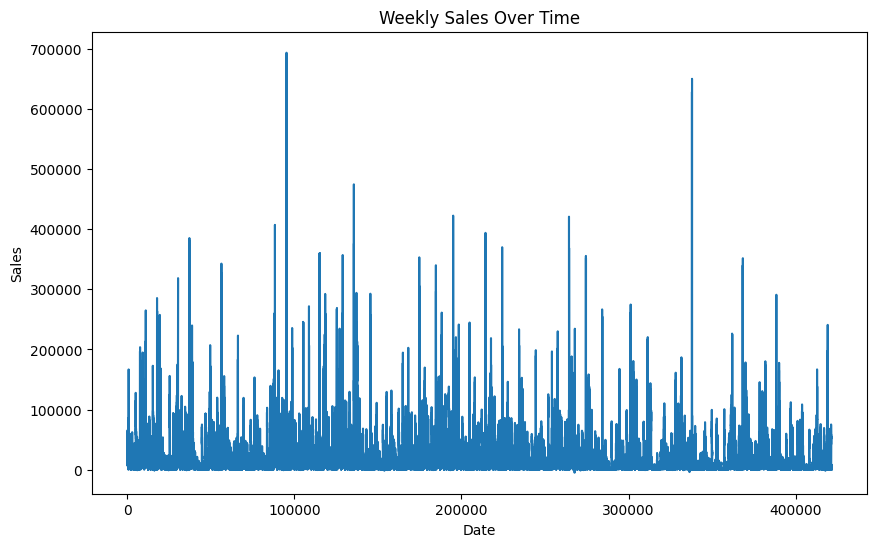

Text(0.5, 1.0, 'Weekly Sales by Department')

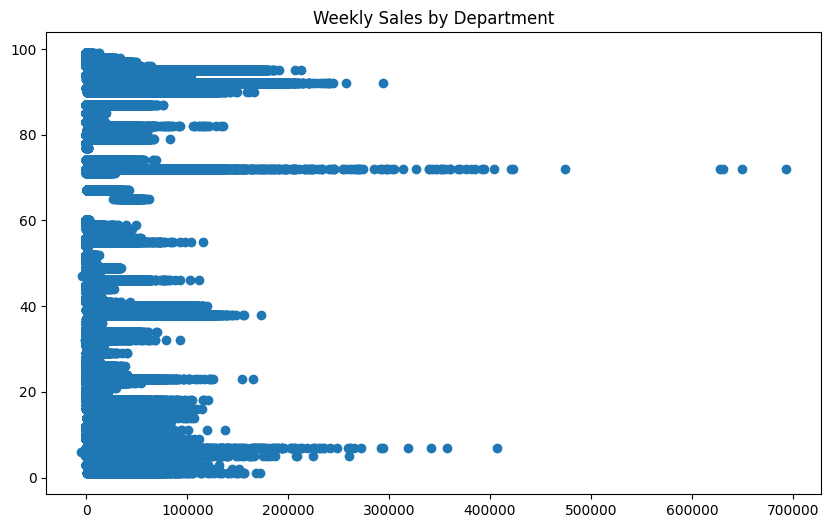

In [58]:
# Display the first few rows of the train dataset
print(train.head())

# Basic stats of the data
print(train.describe())

# Visualization: Sales trends
plt.figure(figsize=(10,6))
plt.plot(train['Weekly_Sales'])
plt.title('Weekly Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()

# Visualization: Sales by Department
plt.figure(figsize=(10,6))
plt.scatter(train['Weekly_Sales'], train['Dept'])
plt.title('Weekly Sales by Department')


In [59]:
##  Data Preprocessing and Cleaning

print(train.head())

# Handling missing values
features.fillna(0, inplace=True)

# Merging datasets
train = train.merge(stores, how='left').merge(features, how='left', on=['Store', 'Date'])
test = test.merge(stores, how='left').merge(features, how='left', on=['Store', 'Date'])



   Store  Dept        Date  Weekly_Sales  IsHoliday
0      1     1  2010-02-05      24924.50      False
1      1     1  2010-02-12      46039.49       True
2      1     1  2010-02-19      41595.55      False
3      1     1  2010-02-26      19403.54      False
4      1     1  2010-03-05      21827.90      False


In [60]:
print(train.head())

# One-hot encode 'Type' column
#train = pd.get_dummies(train, columns=['Type'])

print(train.head())

# Define features and target
X = train.drop(['Weekly_Sales', 'Date', 'Type'], axis=1)
y = train['Weekly_Sales']

# Split the data
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the model
model = RandomForestRegressor(n_estimators=100)

# Train the model
model.fit(X_train, y_train)


   Store  Dept        Date  Weekly_Sales  IsHoliday_x Type    Size  \
0      1     1  2010-02-05      24924.50        False    A  151315   
1      1     1  2010-02-12      46039.49         True    A  151315   
2      1     1  2010-02-19      41595.55        False    A  151315   
3      1     1  2010-02-26      19403.54        False    A  151315   
4      1     1  2010-03-05      21827.90        False    A  151315   

   Temperature  Fuel_Price  MarkDown1  MarkDown2  MarkDown3  MarkDown4  \
0        42.31       2.572        0.0        0.0        0.0        0.0   
1        38.51       2.548        0.0        0.0        0.0        0.0   
2        39.93       2.514        0.0        0.0        0.0        0.0   
3        46.63       2.561        0.0        0.0        0.0        0.0   
4        46.50       2.625        0.0        0.0        0.0        0.0   

   MarkDown5         CPI  Unemployment  IsHoliday_y  
0        0.0  211.096358         8.106        False  
1        0.0  211.242170  

RandomForestRegressor()

In [61]:
# Predict on validation set
predictions = model.predict(X_val)

# Evaluate the model
print('Mean Absolute Error:', mean_absolute_error(y_val, predictions))


Mean Absolute Error: 1849.08471651683


In [ ]:
print(test.describe())

In [62]:
# Prepare the test data
X_test = test.drop(['Date','Type'], axis=1)

# Make predictions on test data
test_predictions = model.predict(X_test)

# Print test predictions
print(test_predictions)
pd.DataFrame(test_predictions).to_csv(' .csv')

[20610.428  26094.9658 22308.1317 ...   747.3188   755.7673   799.5869]
